In [59]:
# 一个mnist识别的代码
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [4]:
# 这是传统的全链接网络
class simple_Net(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(simpleNet, self).__init__()
        self.layer1 = nn.Linear(in_dim, n_hidden_1)
        self.layer2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.layer3 = nn.Linear(n_hidden_2, out_dim)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [5]:
# 定义带了ReLU激活层的网络
class Activation_Net(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Activation_Net, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hidden_1), nn.ReLU(True))     # 将 Linear和ReLU组合成一个layer
        self.layer2 = nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2), nn.ReLU(True)) # 将 Linear和ReLU组合成一个layer
        self.layer3 = nn.Sequential(nn.Linear(n_hidden_2, out_dim))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [6]:
# 定义带了ReLU激活层和BN层的网络
class Batch_Net(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Batch_Net, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hidden_1), nn.BatchNorm1d(n_hidden_1), nn.ReLU(True))     # 将 Linear, BN, ReLU组合成一个layer
        self.layer2 = nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2), nn.BatchNorm1d(n_hidden_2), nn.ReLU(True)) # 将 Linear, BN, ReLU组合成一个layer
        self.layer3 = nn.Sequential(nn.Linear(n_hidden_2, out_dim))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [47]:
# 开始准备数据
batch_size = 64
lr = 1e-2
num_epoches = 10

data_tf = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5],[0.5])])

train_dataset = datasets.MNIST(root='./data', train=True, transform=data_tf, download=True)

test_dataset = datasets.MNIST(root='./data', train=False, transform=data_tf)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# model = simpleNet(28*28, 300, 100, 10)
model = Activation_Net(28*28, 300, 100, 10)
# model = Batch_Net(28*28, 300, 100, 10)

loss_func = nn.CrossEntropyLoss()

opti_func = optim.Adam(model.parameters(), lr=lr)


In [64]:
# 开始训练
train_loss = list(range(num_epoches))
for epoch in range(num_epoches):
    train_loss[epoch] = 0
    for train_data in train_loader:
        img, label = train_data
        img = img.view(img.size(0), -1)
        img = Variable(img)
        label = Variable(label)
        ##### forward #####
        out = model(img)
        loss = loss_func(out, label)
        ##### backward ###
        opti_func.zero_grad()
        loss.backward()
        opti_func.step()
    print("train loss: {}".format(loss))
    train_loss[epoch] = loss.data
print(train_loss)
    
# Simple_Net      : train loss: 0.49769243597984314
# Activation_Net  : train loss: 0.025277957320213318
# Batch_Net.      : train loss: 0.05666544288396835

train loss: 0.9850098490715027
train loss: 0.001805473119020462
train loss: 0.09947649389505386
train loss: 0.05861756205558777
train loss: 0.1603401005268097
train loss: 0.024322785437107086
train loss: 0.2742932438850403
train loss: 0.002995947143062949
train loss: 0.2160206139087677
train loss: 5.477942977449857e-05
[tensor(0.9850), tensor(0.0018), tensor(0.0995), tensor(0.0586), tensor(0.1603), tensor(0.0243), tensor(0.2743), tensor(0.0030), tensor(0.2160), tensor(5.4779e-05)]


In [51]:
# 开始测试
model.eval()
eval_loss = 0
eval_acc = 0

for data in test_loader:
    img, label = data
    img = img.view(img.size(0), -1)
    img = Variable(img)
    label = Variable(label)
    
    out = model(img)
    loss = loss_func(out, label)
    eval_loss += loss.data * label.size(0)
    _, pred = torch.max(out, 1)
    num_correct = (pred==label).sum()
    eval_acc += num_correct.data

print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss/(len(test_dataset)), eval_acc/(len(test_dataset))))

# Simple_Net      : Test Loss: 0.505879, Acc: 0.849400
# Activation_Net  : Test Loss: 0.207220, Acc: 0.950500
# Batch_Net       : Test Loss: 0.087046, Acc: 0.977900

Test Loss: 0.207220, Acc: 0.950500


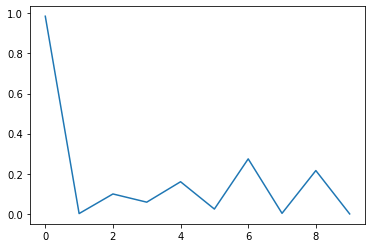

In [65]:
plt.plot(train_loss)
plt.show()